In [ ]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import matplotlib.animation as animation
from IPython.display import HTML



In [ ]:
df = pd.read_csv('plays.csv', sep=",")

In [ ]:
df

,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,defensiveTeam,yardlineSide,yardlineNumber,...,yardsGained,homeTeamWinProbabilityAdded,visitorTeamWinProbilityAdded,expectedPointsAdded,isDropback,pff_runConceptPrimary,pff_runConceptSecondary,pff_runPassOption,pff_passCoverage,pff_manZone
0,2022102302,2655,(1:54) (Shotgun) J.Burrow pass short middle to...,3,1,10,CIN,ATL,CIN,21,...,9,0.004634,-0.004634,0.702717,True,NaN,NaN,0,Cover-3,Zone
1,2022091809,3698,(2:13) (Shotgun) J.Burrow pass short right to ...,4,1,10,CIN,DAL,CIN,8,...,4,0.002847,-0.002847,-0.240509,True,NaN,NaN,0,Quarters,Zone
2,2022103004,3146,(2:00) (Shotgun) D.Mills pass short right to D...,4,3,12,HOU,TEN,HOU,20,...,6,0.000205,-0.000205,-0.218480,True,NaN,NaN,0,Quarters,Zone
3,2022110610,348,(9:28) (Shotgun) P.Mahomes pass short left to ...,1,2,10,KC,TEN,TEN,23,...,4,-0.001308,0.001308,-0.427749,True,NaN,NaN,0,Quarters,Zone
4,2022102700,2799,(2:16) (Shotgun) L.Jackson up the middle to TB...,3,2,8,BAL,TB,TB,27,...,-1,0.027141,-0.027141,-0.638912,False,MAN,READ OPTION,0,Cover-1,Man
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16119,2022110604,1051,(12:49) (Shotgun) T.Lawrence pass incomplete s...,2,3,4,JAX,LV,JAX,31,...,0,-0.024741,0.024741,-1.391687,True,NaN,NaN,0,Cover-2,Zone
16120,2022103005,3492,(12:32) (Shotgun) K.Cousins pass incomplete de...,4,1,10,MIN,ARI,MIN,25,...,0,-0.026580,0.026580,-0.503208,True,NaN,NaN,0,Cover-3,Zone
16121,2022092502,2337,(9:59) (Shotgun) P.Mahomes scrambles right end...,3,1,10,KC,IND,IND,13,...,10,-0.013790,0.013790,1.073898,True,NaN,NaN,0,Quarters,Zone
16122,2022091809,719,(:45) C.Rush pass incomplete deep right to C.L...,1,1,10,DAL,CIN,CIN,47,...,0,-0.011561,0.011561,-0.522397,True,UNDEFINED,NaN,0,Cover-3,Zone


In [ ]:
df.columns

Index(['gameId', 'playId', 'playDescription', 'quarter', 'down', 'yardsToGo',
       'possessionTeam', 'defensiveTeam', 'yardlineSide', 'yardlineNumber',
       'gameClock', 'preSnapHomeScore', 'preSnapVisitorScore',
       'playNullifiedByPenalty', 'absoluteYardlineNumber',
       'preSnapHomeTeamWinProbability', 'preSnapVisitorTeamWinProbability',
       'expectedPoints', 'offenseFormation', 'receiverAlignment',
       'playClockAtSnap', 'passResult', 'passLength', 'targetX', 'targetY',
       'playAction', 'dropbackType', 'dropbackDistance', 'passLocationType',
       'timeToThrow', 'timeInTackleBox', 'timeToSack', 'passTippedAtLine',
       'unblockedPressure', 'qbSpike', 'qbKneel', 'qbSneak',
       'rushLocationType', 'penaltyYards', 'prePenaltyYardsGained',
       'yardsGained', 'homeTeamWinProbabilityAdded',
       'visitorTeamWinProbilityAdded', 'expectedPointsAdded', 'isDropback',
       'pff_runConceptPrimary', 'pff_runConceptSecondary', 'pff_runPassOption',
       'pff_pass

In [ ]:
data = df['yardsGained']

In [ ]:
data.unique()

array([  9,   4,   6,  -1,   3,   5,   0,  15,  12,   2,  -2,   7,  23,
        40,  42,  25,   1,   8,  14,  19,  62,  10,  13,  16,  53,  -3,
        -7,  28,  -5,  11,  20,  22,  35,  59,  21,  27,  18,  17,  -6,
        -4, -12,  31,  34,  -9,  60, -16, -10,  -8, -14, -11,  45,  24,
        54,  38, -18, -15,  29,  43,  47,  32,  41,  30,  33,  67,  48,
        26,  39,  44,  36,  49,  74,  57,  64,  51,  50,  61, -19, -17,
       -21,  55, -13,  46,  37,  63,  58,  52,  69,  75, -45, -30, -61,
        56, -20,  79, -34,  71, -39,  98, -68, -59,  68,  81])

In [ ]:
# Normalize the data
scaler = MinMaxScaler(feature_range=(-1, 1))
# Convert the Pandas Series to a NumPy array before reshaping.
data_np = data.to_numpy()
# Reshape the NumPy array to a 2D array.
data_2d = data_np[:, np.newaxis]
# Apply the scaling.
data = scaler.fit_transform(data_2d)

In [ ]:
# Function to create sequences for RNNs
def create_sequences(data, seq_length):
    sequences = []
    labels = []
    for i in range(len(data) - seq_length):
        sequences.append(data[i:i+seq_length])
        labels.append(data[i+seq_length])
    return torch.tensor(sequences, dtype=torch.float32), torch.tensor(labels, dtype=torch.float32)

In [ ]:
seq_length = 30  # Use past 30 days to predict the next day
X, y = create_sequences(data, seq_length)


<ipython-input-13-96730c60488e>:8: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:278.)
  return torch.tensor(sequences, dtype=torch.float32), torch.tensor(labels, dtype=torch.float32)


In [ ]:
# Reshape X to match PyTorch format (batch_size, sequence_length, features)
X = X.view(X.shape[0], seq_length, 1)

#Define RNN, LSTM, and GRU Models

In [ ]:

class RNNModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNNModel, self).__init__()
        self.hidden_size = hidden_size
        self.rnn = nn.RNN(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out, _ = self.rnn(x)
        out = self.fc(out[:, -1, :])  # Take the last time step's output
        return out

class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(LSTMModel, self).__init__()
        self.hidden_size = hidden_size
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out, _ = self.lstm(x)
        out = self.fc(out[:, -1, :])  # Take the last time step's output
        return out

class GRUModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(GRUModel, self).__init__()
        self.hidden_size = hidden_size
        self.gru = nn.GRU(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out, _ = self.gru(x)
        out = self.fc(out[:, -1, :])  # Take the last time step's output
        return out


#Training the Models and Recording Loss

In [ ]:

def train_model(model, X, y, epochs=100, learning_rate=0.001):
    criterion = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    losses = []

    for epoch in range(epochs):
        optimizer.zero_grad()
        output = model(X)
        loss = criterion(output, y.view(-1, 1))
        loss.backward()
        optimizer.step()
        losses.append(loss.item())

        if epoch % 10 == 0:
            print(f'Epoch {epoch}, Loss: {loss.item():.4f}')

    return losses

# Initialize models
rnn_model = RNNModel(input_size=1, hidden_size=64, output_size=1)
lstm_model = LSTMModel(input_size=1, hidden_size=64, output_size=1)
gru_model = GRUModel(input_size=1, hidden_size=64, output_size=1)

# Train models and record loss
rnn_losses = train_model(rnn_model, X, y)
lstm_losses = train_model(lstm_model, X, y)
gru_losses = train_model(gru_model, X, y)


Epoch 0, Loss: 0.0175
Epoch 10, Loss: 0.0117
Epoch 20, Loss: 0.0115
Epoch 30, Loss: 0.0114
Epoch 40, Loss: 0.0113
Epoch 50, Loss: 0.0113
Epoch 60, Loss: 0.0113
Epoch 70, Loss: 0.0113
Epoch 80, Loss: 0.0113
Epoch 90, Loss: 0.0113
Epoch 0, Loss: 0.0281
Epoch 10, Loss: 0.0123
Epoch 20, Loss: 0.0113
Epoch 30, Loss: 0.0116
Epoch 40, Loss: 0.0113
Epoch 50, Loss: 0.0113
Epoch 60, Loss: 0.0113
Epoch 70, Loss: 0.0113
Epoch 80, Loss: 0.0113
Epoch 90, Loss: 0.0113
Epoch 0, Loss: 0.0163
Epoch 10, Loss: 0.0119
Epoch 20, Loss: 0.0116
Epoch 30, Loss: 0.0114
Epoch 40, Loss: 0.0113
Epoch 50, Loss: 0.0113
Epoch 60, Loss: 0.0113
Epoch 70, Loss: 0.0113
Epoch 80, Loss: 0.0113
Epoch 90, Loss: 0.0113


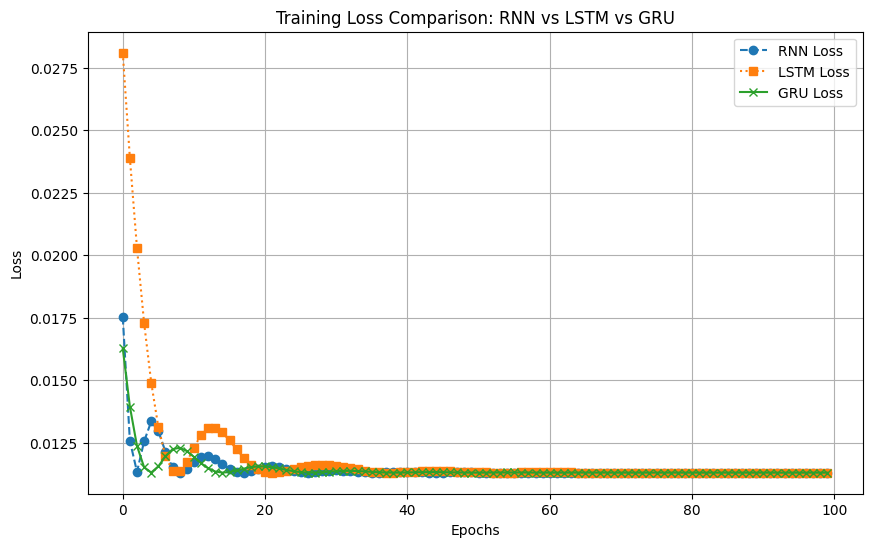

In [ ]:

# Plot Training Loss Curves
plt.figure(figsize=(10,6))
plt.plot(rnn_losses, label='RNN Loss', linestyle='dashed', marker='o')
plt.plot(lstm_losses, label='LSTM Loss', linestyle='dotted', marker='s')
plt.plot(gru_losses, label='GRU Loss', linestyle='solid', marker='x')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Comparison: RNN vs LSTM vs GRU')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:

def predict(model, input_seq):
    model.eval()
    input_seq = torch.tensor(input_seq, dtype=torch.float32).view(1, seq_length, 1)
    with torch.no_grad():
        prediction = model(input_seq)
    return scaler.inverse_transform(prediction.numpy().reshape(-1, 1))[0][0]

# Example Test Case (Predict Next Day's Closing Price)
test_seq = data[-seq_length:].reshape(-1, 1)  # Use the last 30 days
print("RNN Prediction:", predict(rnn_model, test_seq))
print("LSTM Prediction:", predict(lstm_model, test_seq))
print("GRU Prediction:", predict(gru_model, test_seq))


RNN Prediction: 5.8712716
LSTM Prediction: 5.838672
GRU Prediction: 5.691894


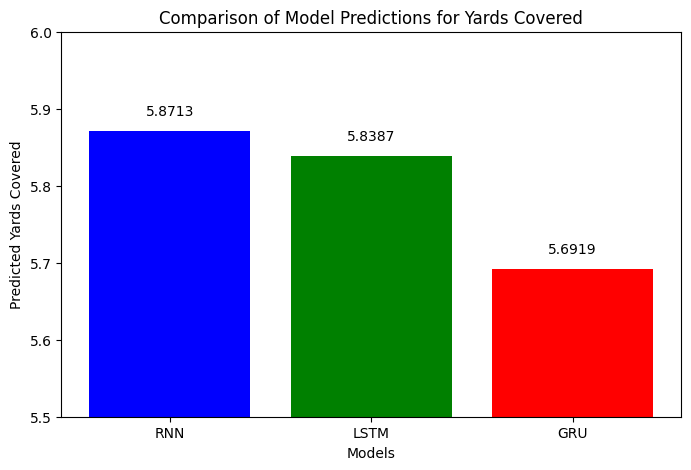

In [2]:
import matplotlib.pyplot as plt

# Model names and Predictions
models = ["RNN", "LSTM", "GRU"]
predictions = [rnn_pred, lstm_pred, gru_pred]

# Plot
plt.figure(figsize=(8, 5))
plt.bar(models, predictions, color=['blue', 'green', 'red'])

# Labels and title
plt.xlabel("Models")
plt.ylabel("Predicted Value")
plt.title("Comparison of Model Predictions")

# Display values on bars
for i, v in enumerate(predictions):
    plt.text(i, v + 0.02, f"{v:.4f}", ha='center', fontsize=10)

# Show plot
plt.show()



In [1]:
import torch
from transformers import pipeline

# Manually set a different GPU (e.g., GPU 1 instead of GPU 0)
torch.cuda.set_device(1)  # Change to another GPU index

explainer = pipeline("text-generation", model="HuggingFaceH4/zephyr-7b-alpha", device=2)

prompt = "Explain the difference between RNN, LSTM, AND GRU, and which one is better than others."

explanation = explainer(prompt, max_length=100)

print(explanation[0]["generated_text"])


Loading checkpoint shards: 100%|██████████| 8/8 [00:03<00:00,  2.32it/s]
Device set to use cuda:2
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Explain the difference between RNN, LSTM, AND GRU, and which one is better than others.

RNN (Recurrent Neural Networks) is a type of neural network that can process sequences of data. It has a feedback connection that allows it to remember previous inputs and use them to predict the output for the current input. RNNs are useful for tasks such as speech recognition, machine translation, and sentiment analysis.

LSTM (Long Short-Term Memory) overcome the vanishing gradient problem by using gates (input, forget, and output) t